# Processing data

Read data already collected

In [35]:
import json
import time
import datetime
import pandas as pd
import numpy as np

tweets_data_morn = '/Users/Madhu/Documents/Courses/data_bds/bitcoin'
tweets_data_eve = '/Users/Madhu/Documents/Courses/data_bds/btctwitter'

tweets_data_m = []
tweets_data_e = []

tweets_file = open(tweets_data_morn, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data_m.append(tweet)
    except:
        continue
        
tweets_file = open(tweets_data_eve, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data_e.append(tweet)
    except:
        continue


In [36]:
print (len(tweets_data_m))

8035


In [37]:
print (len(tweets_data_e))

1415


In [38]:
tweets_data_e[0]['created_at']

'Sat Oct 28 01:33:58 +0000 2017'

In [39]:
date_col = []
lang = []
text = []

for line in tweets_data_e:
    try:
        date_col.append(datetime.datetime.strptime(line['created_at'],'%a %b %d %H:%M:%S +0000 %Y'))
        lang.append(line['lang'])
        text.append(line['text'])
    except:
        continue

In [40]:
d = {'date': date_col, 'lang': lang, 'text':text}
df = pd.DataFrame(data=d)

In [41]:
df.head()

,date,lang,text
0,2017-10-28 01:33:58,en,RT @svetlan31125165: Join our team\n\nhttps://t.co/NH6aFCJhws\n\n$KMD $OKCash $BCC $XVG $OMG $QTUM $STRAT $DASH $ETH $LUN $DGB $LTC $XRP…
1,2017-10-28 01:33:57,en,RT @AiSynapse: Watch our new video explaining how we are democratizing data and AI on the blockchain https://t.co/a0YLViqSmp #ai #ico #bloc…
2,2017-10-28 01:33:58,en,RT @intuitecon: Comp article on why #Bitcoin &amp; #Ether have real value.\n\n#Ethereum #Ether $BTC $ETH #Fintech $SPY #AI $LTC $QQQ $USD…
3,2017-10-28 01:33:59,en,RT @StevenJnsen: Want to chance win giveaway 5 $ETH?\n1. Register at here https://t.co/FwtKC0GCPY\n2. Follow &amp; retweet at this…
4,2017-10-28 01:34:00,en,RT @reach2ratan: #Blockchain for #Cybersecurity\nv/ @BlockArmour\n#Fintech #makeyourownlane #Mpgvip #cryptocurrency #cybersecurity…


In [42]:
df_en = df[df['lang']=='en']

In [43]:
pd.set_option('max_colwidth',150)
df_en['text']

0              RT @svetlan31125165: Join our team\n\nhttps://t.co/NH6aFCJhws\n\n$KMD $OKCash $BCC $XVG $OMG $QTUM $STRAT $DASH $ETH $LUN $DGB $LTC $XRP… 
1            RT @AiSynapse: Watch our new video explaining how we are democratizing data and AI on the blockchain https://t.co/a0YLViqSmp #ai #ico #bloc…
2             RT @intuitecon: Comp article on why #Bitcoin &amp; #Ether have real value.\n\n#Ethereum #Ether $BTC $ETH #Fintech $SPY #AI $LTC $QQQ $USD… 
3                    RT @StevenJnsen: Want to chance win giveaway 5 $ETH?\n1. Register at here https://t.co/FwtKC0GCPY\n2. Follow &amp; retweet at this… 
4                    RT @reach2ratan: #Blockchain for #Cybersecurity\nv/ @BlockArmour\n#Fintech #makeyourownlane #Mpgvip #cryptocurrency #cybersecurity… 
5                             Global Crypto Wallet for POS. https://t.co/JXTr8NiJxu #sanFransico #perth #godblessamerica #france… https://t.co/ITD3oaEVrK
6                                    $XLM 🚀 19 +3.37%  🕐 in the last 24 hour

In [21]:
df_en.to_csv('bitcoin_eng.csv') # this has all 4 bitcoins
#get data from the csv directly instead of running it till now

In [22]:
from pycorenlp import StanfordCoreNLP

In [23]:
nlp = StanfordCoreNLP('http://localhost:9000')

## Sample stanfordcoreNLP

In [24]:
res = nlp.annotate("I love you. I hate him. You are nice. He is dumb",
                   properties={
                       'annotators': 'sentiment',
                       'outputFormat': 'json'
                   })
for s in res["sentences"]:
    print ("%d: '%s': %s %s" % (s["index"]," ".join([t["word"] for t in s["tokens"]]),s["sentimentValue"], s["sentiment"]))

0: 'I love you .': 3 Positive
1: 'I hate him .': 1 Negative
2: 'You are nice .': 3 Positive
3: 'He is dumb': 1 Negative


In [45]:
#filtering the tweets
#df_en.head()

senti_val = []
senti = []

for line in df_en['text']:
    res = nlp.annotate(line,
                   properties={
                       'annotators': 'sentiment',
                       'outputFormat': 'json'
                   })
    senti_val.append(s["sentimentValue"])
    senti.append(s["sentiment"])
    

In [50]:
myset = set(senti)
print (myset)

{'Neutral'}


In [ ]:
#they are all neutral :/
#let's bin values

## Price of BTC

In [10]:
bitcoin_price = pd.read_csv('/Users/Madhu/Documents/Courses/data_bds/BTC_20.csv')

In [11]:
bitcoin_price.head()

,Date,Close Price
0,10/20/17 0:00,5699.58
1,10/20/17 0:01,5699.40
2,10/20/17 0:02,5700.21
3,10/20/17 0:03,5700.17
4,10/20/17 0:04,5701.31


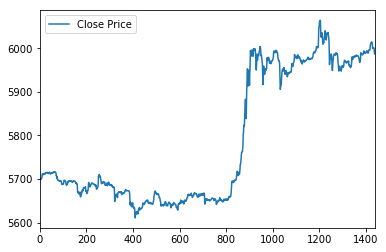

In [12]:
import matplotlib.pyplot as plt

%matplotlib inline

bitcoin_price.plot()

Sample of grouping using date and count

In [ ]:
grp = data.groupby(by=[data.datetime_col.map(lambda x : (x.hour, x.minute))])
grp.count()